In [2]:
user = "HOME"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\HOME\Desktop\dynamical-systems\env\integrate`

jacob_TM_ (generic function with 1 method)

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
#x1, y1, z1, x2, y2, z2, z  = -30..30, -30..30,  -30..30, -30..30, -30..30, -30..30, -30..30
#box = x1 × y1 × z1 × x2 × y2 × z2 × z
using CairoMakie

In [4]:
function HR_mem(u, p, t)
    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    memristor(z, k1_me, k2_me) = k1_me + k2_me * z^2

    a, b, c, d, s, xr, r,  I, vs, k1, k2, k1_me, k2_me  = p
    x1, y1, z1, x2, y2, z2, z = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + memristor(z, k1_me, k2_me)*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + memristor(z, k1_me, k2_me)*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    du7 = x1 - x2
    
    return SVector(du1, du2, du3, du4, du5, du6, du7)
end

HR_mem (generic function with 1 method)

In [326]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= 0.07; k2 = 0.07;
k1_me = 0.35
k2_me = 0.0
u0 = [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k1_me, k2_me];

In [327]:
tt = 3000
time = 1500
tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

(alg = RK4(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), adaptive = false, dt = 0.001)

In [328]:
syka = [-0.5191345591508597
-0.20806201734476223
 4.708031581180823
-0.5191345591508597
-0.20806201734476223
 4.708031581180823
 1.7613505759545642]

7-element Vector{Float64}:
 -0.5191345591508597
 -0.20806201734476223
  4.708031581180823
 -0.5191345591508597
 -0.20806201734476223
  4.708031581180823
  1.7613505759545642

In [329]:
ds = CoupledODEs(HR_mem, u0, p, diffeq = integ_set)
ds1 = CoupledODEs(HR_mem, syka, p, diffeq = integ_set)

tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = tt)
tr1, trange1 = trajectory(ds1, time; Δt = integ_set.dt, Ttr = tt)

xsum = tr[:, 1] + tr[:, 4];
xsum1 = tr[:, 1] + tr[:, 4];

In [330]:
ds = CoupledODEs(HR_mem, tr[end], p, diffeq = integ_set)
LSE = lyapunovspectrum(ds, time)

7-element Vector{Float64}:
  0.01127262647103428
 -0.0013389654643653263
  0.000980901600046094
 -0.0035118218650136623
 -0.016814036953287904
 -8.579822518940476
 -9.824037204117085

In [331]:
ds1 = CoupledODEs(HR_mem, tr1[end], p, diffeq = integ_set)
LSE1 = lyapunovspectrum(ds1, time)

7-element Vector{Float64}:
  0.012035772976672977
  0.004662031804442611
  0.0049727481449378915
 -0.0014832863494896637
 -0.0016050727639198021
 -8.600599591765949
 -9.34126596074533

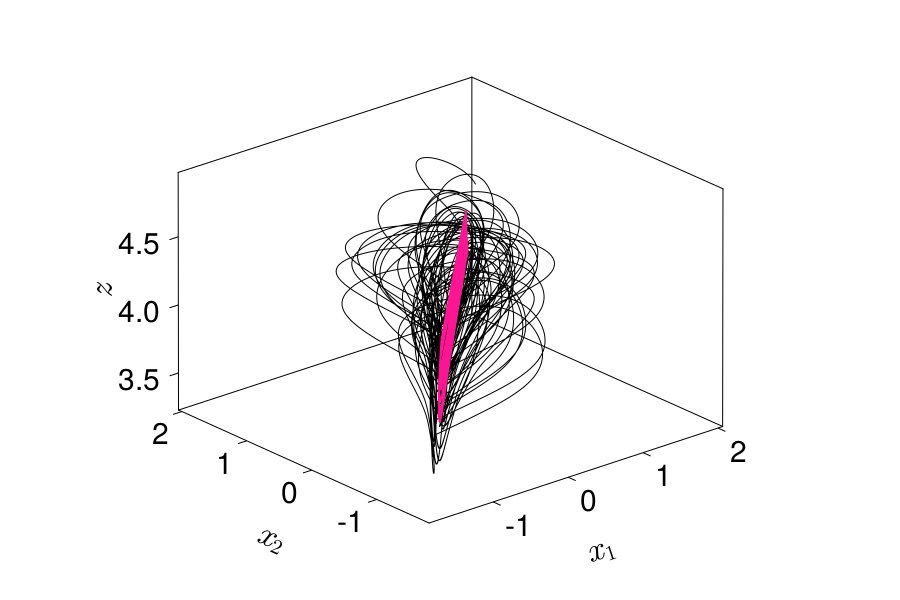

CairoMakie.Screen{IMAGE}


In [332]:
ts, tf = 1, 1500000
idx, idy, idz = 1, 4, 3
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
    linewidth = 1.0, color = :black) # linewidth 3.0

lines!(tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz],
    linewidth = 1.0, color = :deeppink) # linewidth 3.0

display(f)

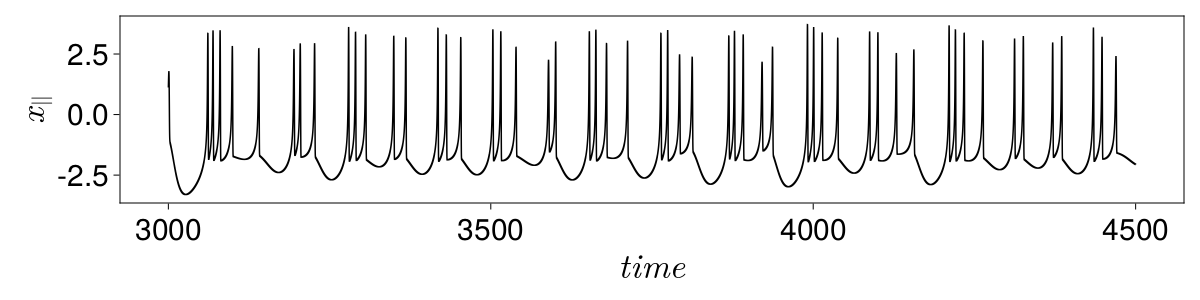

CairoMakie.Screen{IMAGE}


In [333]:
ts, tf = 1, 1500000

CairoMakie.activate!()
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$x_{||}$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(axis, trange[ts:tf], xsum[ts:tf], linewidth = 1.5, color = :black)
display(f)